<a href="https://colab.research.google.com/github/tas-anne/Digital-SIgnal-Processing-LabTask/blob/main/Lab_3__190041220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Course Code: CSE 4632
## Course Name: Digital Signal Processing Lab
## Name: Tasfia Tasneem Annesha
## ID: **190041220** 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
S = [1, 9, 0, 0, 4, 1, 2, 2, 0]
H = [2, 0, 2, 1]

# **Task 1**
 *Use the built-in np.convolve function to convolve S with H. (Use ‘same’ for
padding). Plot the output signal along with the original input signal and impulse
response.* 

This task uses the np.convolve() function in order to perform a convolution operation between the given signal S and an impulse response
H. "Full" padding was used in order to match the output with the later tasks. The input and output signals were plotted in this task as well.

---



In [ ]:
conv = np.convolve(S, H, 'full')
conv

array([ 2, 18,  2, 19, 17,  2, 12, 10,  5,  6,  2,  0])

<ipython-input-4-c0afdade1588>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, conv, label='Output')


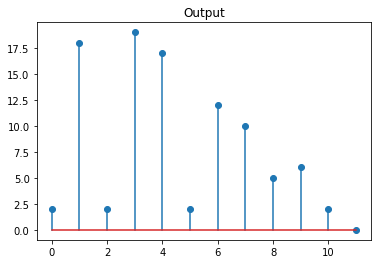

<ipython-input-4-c0afdade1588>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(0, len(S), 1), S, label='Input')


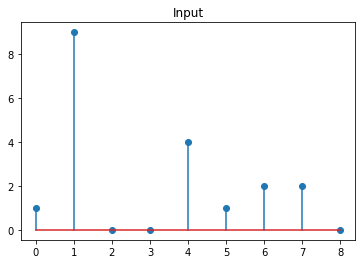

<ipython-input-4-c0afdade1588>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(0, len(H), 1), H, label='Impulse')


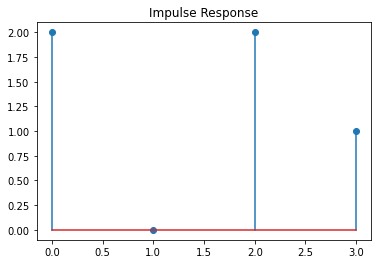

In [ ]:
n = np.arange(0, len(conv), 1)
plt.stem(n, conv, label='Output')
plt.title('Output')
plt.show()
plt.stem(np.arange(0, len(S), 1), S, label='Input')
plt.title('Input')
plt.show()
plt.stem(np.arange(0, len(H), 1), H, label='Impulse')
plt.title('Impulse Response')
plt.show()

# **Task 2**
*Write a custom function InputSideConvolution that implements convolution
using the Input Side Algorithm.*

The input side algorithm to determine the result of convolution between S and H. If n_S and n_H is
the length of the array of the signal and the impulse response respectively, then the length of the result will be (n_S + n_H - 1). The outer
loop FOR loops over all the elements of the signal S. The inner FOR loops over all the elements of the impulse response H. The inner loop
calculates a scaled and shifted version of the impulse response and adds it to the ouput[] array which is an accumulation of all the impulse
responses for that particular input element i. The shitfing is done by placing the accumulated response in the (i + j)th location of the output
array. This nested for loop implements the input side algorithm.

---



In [ ]:
def InputSideAlgorithm(inp, impulse):
    output = np.zeros(len(inp) + len(impulse) - 1)
    for i in range(0, len(inp)):
        for j in range(0, len(impulse)):
            output[i+j] = output[i+j] + (inp[i] * impulse[j])
            
    return output

In [ ]:
InputSideAlgorithm(S, H)

array([ 2., 18.,  2., 19., 17.,  2., 12., 10.,  5.,  6.,  2.,  0.])

## **Task 3**
 *Write another function OutputSideConvolution that uses the Output Side
Algorithm*

The following is an implementation of the output side algorithm. In the input side algortihm that was implemented in the previous task, we had looped over the input signal and created the output through shifting and scaling the impulses. But in the output side algortihm we loop over the output array and fill it. We know that the output side algortihm basically flips the impulse response and then performs a cumulative sum of the product between the response and the inputs. This is being done here in the inner FOR loop. We avoid out-of-bound errors by placing a simple if condition.

In [ ]:
def OutputSideAlgorithm(inp, impulse):
    output = np.zeros(len(inp) + len(impulse) - 1)
    for i in range(0, len(output)):
        for j in range(0, len(impulse)):
            if i-j>=0 and i-j<len(inp):
                output[i] = output[i] + (inp[i-j] * impulse[j])
    return output

In [ ]:
OutputSideAlgorithm(S, H)

array([ 2., 18.,  2., 19., 17.,  2., 12., 10.,  5.,  6.,  2.,  0.])

## **Task 4**
*Does all three produce the same result?*

This task shows that the input and output side algorithms have been implemented correctly.

---



In [ ]:
print(f'Using np.convolve: {np.convolve(S, H, "full")}')
print(f'Using input side algo: {InputSideAlgorithm(S, H)}')
print(f'Using output side algo: {OutputSideAlgorithm(S, H)}')

Using np.convolve: [ 2 18  2 19 17  2 12 10  5  6  2  0]
Using input side algo: [ 2. 18.  2. 19. 17.  2. 12. 10.  5.  6.  2.  0.]
Using output side algo: [ 2. 18.  2. 19. 17.  2. 12. 10.  5.  6.  2.  0.]


## **Task 5**
*First create the signal wave_plus_ramp as shown in the given figures.*

In this task at first we create a wave_plus_ramp signal as instructed in the task. We then create a low pass filter kernel with 20 non-zero samples. We then convolve it with the wave_plus_ramp signal. In the output we see that the ramp was retained and the wave was discarded. This is because the low-pass filter kernel retains the low frequency components from the signal hence giving us the output of only the ramp.

---



<ipython-input-10-41cff08ed5d3>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(wave)


<StemContainer object of 3 artists>

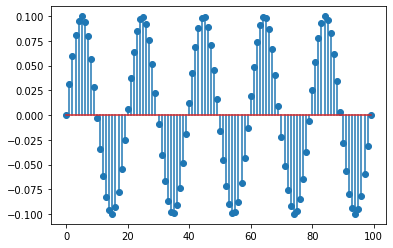

In [ ]:
freq = 1
amplitude = 0.1
t = np.linspace(0, 5, 100)
wave = amplitude * np.sin(2 * np.pi * freq * t)

plt.stem(wave)

<ipython-input-11-98ab68055f73>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(ramp)


<StemContainer object of 3 artists>

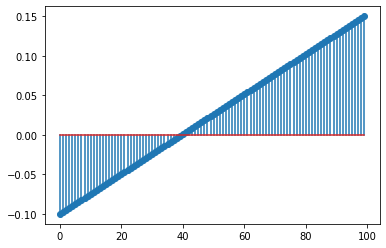

In [ ]:
ramp = 0.05*t - 0.1
plt.stem(ramp)

<ipython-input-12-ec6c6d5c40fd>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(wave_plus_ramp)


<StemContainer object of 3 artists>

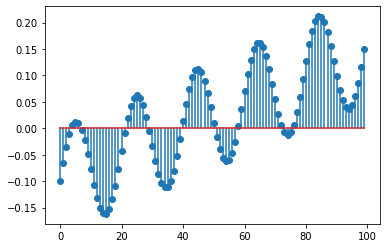

In [ ]:
wave_plus_ramp = wave + ramp
plt.stem(wave_plus_ramp)

In [ ]:
def low_pass_filter(inp, filter_size):
    low_pass_kernel = [1/filter_size] * filter_size
    output = np.convolve(inp, low_pass_kernel, 'valid')
    return output

<ipython-input-14-4297aaf5613d>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(output)


<StemContainer object of 3 artists>

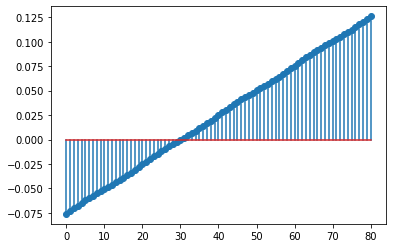

In [ ]:
output = low_pass_filter(wave_plus_ramp, 20)
plt.stem(output)

## **Task 6**

*Now, take the low_pass_filter kernel and change every sample’s sign. Now add
1 to the sample in the middle of the kernel. This will produce a high_pass filter.
Now convolve wave_plus_ramp with high_pass filter kernel using np.convolve.
(Use ‘valid’ for padding)
This will discard the ramp and retain the wave. Can you tell why?*

This task is quite similar to the previous one. Here, at first, we implement the high pass filter kernel as intructed in the task. Convolving this kernel with the input signal gives us only the wave and will discard the ramp. This is because the high pass filter retains the high frequency components and discards the low frequency ones. As a result we get the signal back.

---



In [ ]:
def high_pass_filter(inp, filter_size):
    high_pass_kernel = [-1/filter_size] * filter_size
    high_pass_kernel[0] = 1 - high_pass_kernel[0]
    output = np.convolve(inp, high_pass_kernel, 'valid')
    return output

<ipython-input-16-c353d19457a4>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(output)


<StemContainer object of 3 artists>

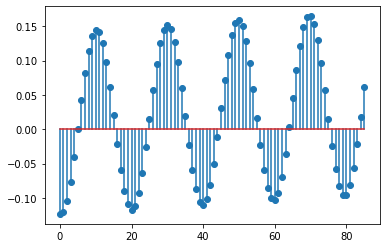

In [ ]:
output = high_pass_filter(wave_plus_ramp, 15)
plt.stem(output)